In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import matplotlib.cm am
import folium

In [2]:
# !pip install folium
# import folium

In [3]:
# !wget -O 'death.csv' 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv'

In [4]:
df_death = pd.read_csv('Deaths.csv')
df_rec = pd.read_csv('Recovered.csv')
df_con = pd.read_csv('Confirmed.csv')
# df_death = pd.read_csv('https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv')
# df_con = pd.read_csv('https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv')
# df_rec = pd.read_csv('https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv')
# df_rec = pd.read_csv('https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Recovered.csv&filename=time_series_2019-ncov-Recovered.csv')

In [5]:
pakistan = pd.DataFrame(columns = df_death.columns.values,index = ['Confirmed','Death','Recovered'])
pakistan.loc['Confirmed'] = df_con[df_con['Country/Region'] == 'Pakistan'].values
pakistan.loc['Recovered'] = df_rec[df_con['Country/Region'] == 'Pakistan'].values
pakistan.loc['Death'] = df_death[df_death['Country/Region'] == 'Pakistan'].values
pakistan

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
Confirmed,NaN,Pakistan,30.3753,69.3451,0,0,0,0,0,0,...,28,31,53,136,236,299,454,501,730,776
Death,NaN,Pakistan,30.3753,69.3451,0,0,0,0,0,0,...,0,0,0,0,0,0,2,3,3,5
Recovered,NaN,Pakistan,30.3753,69.3451,0,0,0,0,0,0,...,2,2,2,2,2,2,13,13,13,5


Text(45, 200, 'Knee Point (Day : 15th March)')

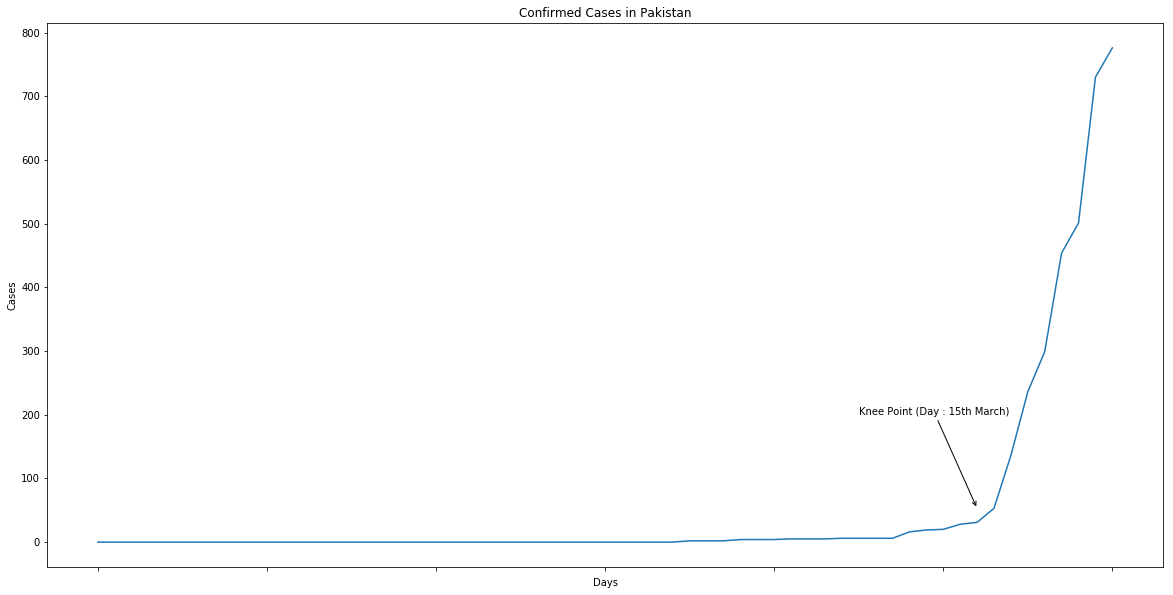

In [6]:
ax = pakistan.drop(['Province/State','Country/Region','Lat','Long'],axis = 1).loc['Confirmed'].T.plot(kind = 'line',figsize = (20,10))
ax.set_title('Confirmed Cases in Pakistan')
ax.set_xlabel('Days')
ax.set_ylabel('Cases')
ax.annotate("Knee Point (Day : 15th March)", xy=(52, 53), xytext=(45, 200),arrowprops=dict(arrowstyle="->"))

In [7]:
df_death.drop(['Province/State'],axis = 1,inplace = True)
df_rec.drop(['Province/State'],axis = 1,inplace = True)
df_con.drop(['Province/State'],axis = 1,inplace = True)

In [8]:
# df.set_index('Country/Region',inplace = True)
# df_death['Total'] = df_death.sum(axis = 1)
# dfI_con['Total'] = df_death.sum(axis = 1)
# df_rec['Total'] = df_death.sum(axis = 1)

In [9]:
df_death = df_death.set_index('Country/Region')
df_con = df_con.set_index('Country/Region')
df_rec = df_rec.set_index('Country/Region')

In [10]:
df_death_sum = df_death.groupby('Country/Region').sum()
df_con_sum = df_con.groupby('Country/Region').sum()
df_rec_sum = df_rec.groupby('Country/Region').sum()

In [11]:
# temp1 = df_rec_sum.loc['Kenya'].copy()
# temp2 = df_rec_sum.loc['Guinea'].copy()
# temp3 = df_rec_sum.loc['Canada'].copy()

# print(temp3)

# df_rec_sum.loc['Kenya'] = temp2
# df_rec_sum.loc['Guinea'] = temp3
# df_rec_sum.loc['Canada'] = temp1

# df_rec.rename(index={'Kenya': 'Guinea','Guinea':'Canada','Canada':'Kenya'},inplace = True)

In [14]:
df_top5 = df_con_sum.drop(['Lat','Long'],axis = 1).sort_values(df_con.columns.values[-1],ascending = False).head()
df_top5

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,80945,80977,81003,81033,81058,81102,81156,81250,81305,81397
Italy,0,0,0,0,0,0,0,0,0,2,...,17660,21157,24747,27980,31506,35713,41035,47021,53578,59138
US,1,1,2,2,5,5,5,5,5,7,...,2179,2727,3499,4632,6421,7783,13677,19100,25489,33272
Spain,0,0,0,0,0,0,0,0,0,0,...,5232,6391,7798,9942,11748,13910,17963,20410,25374,28768
Germany,0,0,0,0,0,1,4,4,4,5,...,3675,4585,5795,7272,9257,12327,15320,19848,22213,24873


Text(0.5, 1.0, 'Top 5 countries with confirmed cases of COVID-19')

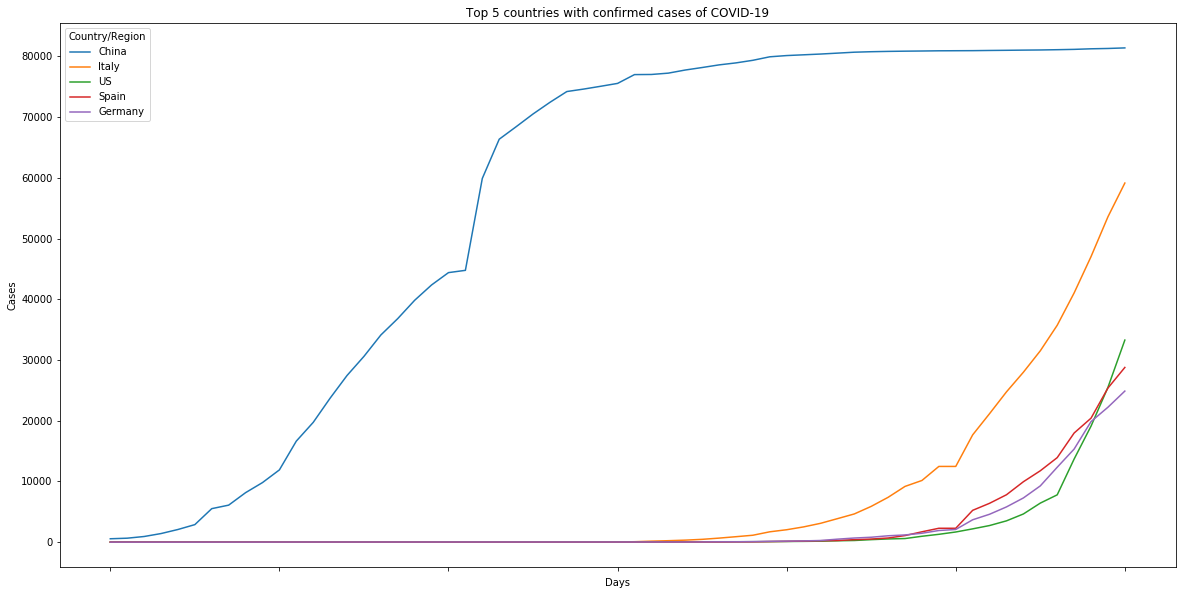

In [15]:
df_top5.T.plot(kind = 'line',figsize = (20,10))
plt.xlabel('Days')
plt.ylabel('Cases')
plt.title('Top 5 countries with confirmed cases of COVID-19')

In [16]:
data = pd.DataFrame(index = df_death_sum.index.values)
data['confirmed'] = df_con_sum.iloc[:,-1]
data['death'] = df_death_sum.iloc[:,-1]
data['recov'] = df_rec_sum.iloc[:,-1]

In [17]:
# # columns = df_top.columns
# df_top.drop('Total',axis = 1).head(5) no
# df_top.columns.name = 'days'
# # df_top
# df_top.head(5).T.plot(kind = 'line',figsize = (20,10),linewidth=2.5)

In [18]:
data_plot = data.sort_values('confirmed',ascending = False).head(8)

In [19]:
# data_plot.reset_index(inplace = True)

In [20]:
data_plot.head()

,confirmed,death,recov
China,81397,3265,72362
Italy,59138,5476,7024
US,33272,417,0
Spain,28768,1772,2575
Germany,24873,94,266


Text(0.5, 1.0, 'Top 5 countries with confirmed cases of COVID-19')

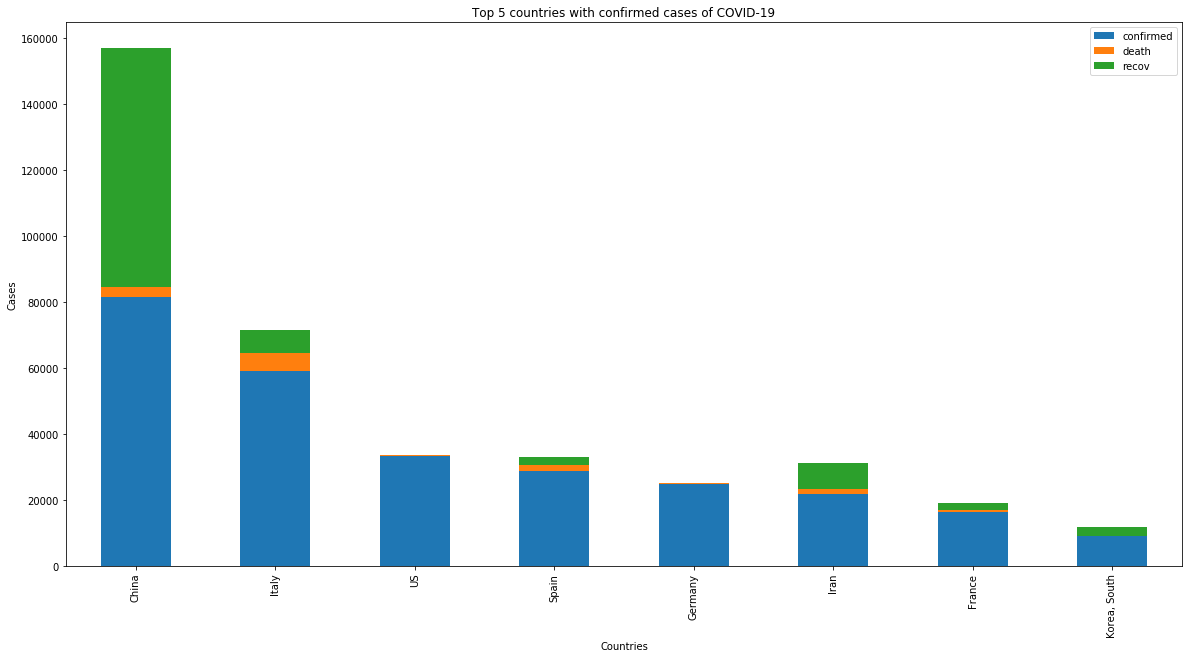

In [21]:
data_plot.plot(kind = 'bar',figsize = (20,10),stacked = True)
plt.xlabel('Countries')
plt.ylabel('Cases')
plt.title('Top 5 countries with confirmed cases of COVID-19')

In [ ]:
x = data_plot.recov.values
y = data_plot.confirmed.values
t = data_plot.death.values

ax = data_plot.plot(kind='scatter',
                    x='recov',
                    y='confirmed',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    s=data_plot.death.values,  # pass in weights 
                    c = t,
                    cmap = 'autumn_r'                   
                   )
n = data_plot.index.values
print(n)

for i, txt in enumerate(n):
    ax.annotate(str(txt), (x[i]-700, y[i]))
ax.set_xlabel('Recovered Patients')
ax.set_ylabel('Confirmed Patients')
ax.set_title('Deaths VS confirmed/recovered patients for top 8 countries')

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In [ ]:
df_death.reset_index(inplace = True)
df_death.rename(columns = {'Country/Region':'country'},inplace = True)

In [ ]:
# from folium import plugins

world_map = folium.Map(location = [30.3753, 69.3451],zoom_start = 5) #Starting location = Pakistan
folium.TileLayer('cartodbdark_matter').add_to(world_map)
cases = folium.map.FeatureGroup()


# for lat, lng, in zip(df_incidents.Y, df_incidents.X):
#     incidents.add_child(
#         folium.features.CircleMarker(
#             [lat, lng],
#             radius=5, # define how big you want the circle markers to be
#             color='yellow',
#             fill=True,
#             fill_color='blue',
#             fill_opacity=0.6
#         )
#     )

# add incidents to map
world_map.add_child(cases)
death = df_death.iloc[:,-1]
con = df_con.iloc[:,-1]
# rec = df_rec.iloc[:,-1]
for i,(lat, lng, label) in enumerate(df_death[['Lat','Long','country']].values):
    if death[i] == 0 or np.isnan(death[i]):
        continue
#     if rec[i] == 0 or np.isnan(rec[i]):
#         continue
    if con[i] == 0 or np.isnan(con[i]):
        continue
    cases.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=int(death[i]/100), 
#             color='red',
            fill=True,
#             popup=label,
            popup = 'C:'+str(int(con[i]))+'\n'+'D:'+str(int(death[i]))+'\n',
            fill_color='red',
            fill_opacity=0.3,
            opacity = 0.3
        )).add_to(world_map)
    
world_map.add_child(folium.ClickForMarker(popup="COVID-19"))

world_map

In [ ]:
df_death.head()